#Grupo 25 - Entregable IAA

#Parte 1 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

Video explicativo:

https://drive.google.com/file/d/1ohpTeixGwUrZhGsgSBgRnW8TtaKBeH9j/view



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Leemos la descripción del Dataset importado

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Vemos que tiene 506 registros, sin valores nulos y vemos la descripción de las 13 columnas

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

No hace falta escribir código para responder estas preguntas.

**Respuestas**

1. ¿De qué se trata el conjunto de datos?

Es un conjunto de datos sobre precios de casas de la ciudad de Boston, de los años '70s. 

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

Se busca predecir el precio de las casas, que viene dado por la columna **MEDV**; valor medio de las viviendas ocupadas por sus propietarios, en miles de dólares.

3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

Este dataset posee 13 atributos disponibles, los cuales son:

CRIM: proporción de crimen per capita por ciudad.

ZN: proporción de terrenos para uso residencial para lotear de más de 25,000 pies cuadrados.

INDUS: proporción de *acres* comerciales no minoristas por ciudad

CHAS: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

NOX: concentración de óxidos nítricos (partes por 10 millones)

RM: promedio de cuartos por vivienda

AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

DIS: distancias ponderadas a cinco centros de empleo de Boston

RAD: índice de accesibilidad a las carreteras radiales

TAX: tasa de impuesto a la propiedad de valor total por $ 10,000

PTRATIO: proporción alumno-profesor por ciudad

B: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas afrodecendientes, por ciudad

LSTAT: % de la población de *status bajo*


4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

RM y quizá CHAS y DIS.

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

El dilema ético que se presenta en este dataset es el hecho de querer predecir el precio de la vivienda tomando como atributo de análisis la proporción de personas negras en la ciudad (atributo "B"). Esto representa un sesgo totalmente racista y sin sentido, por lo tanto descartaremos rotundamente este atributo para las futuras predicciones.

Creamos DataFrame para analisis exploratorio

In [ ]:
df = pd.DataFrame(data = boston["data"], columns = boston['feature_names'])
df.drop(columns = ["B"], inplace = True)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


Descartamos variable "B" (posición 11 en array) por lo mencionado anteriormente

In [ ]:
X = X[:, [*range(1,11)] + [*range(12, len(boston['feature_names']))]]
X_train = X_train[:, [*range(1,11)] + [*range(12, len(boston['feature_names']))]]
X_test = X_test[:, [*range(1,11)] + [*range(12, len(boston['feature_names']))]]

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

**2.1 Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.**

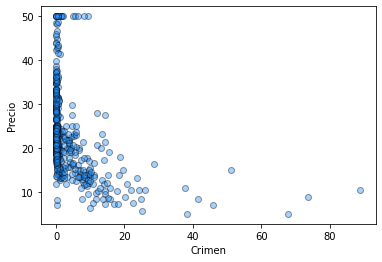

In [ ]:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel('Crimen')
plt.show()

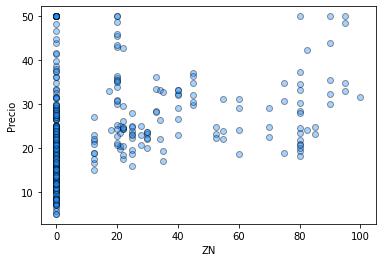

In [ ]:
feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

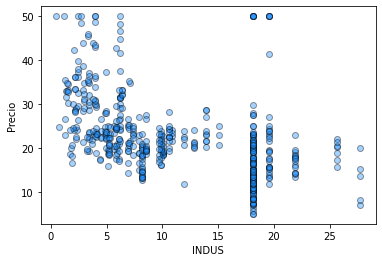

In [ ]:
feature = 'INDUS' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

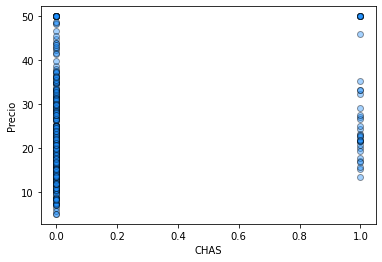

In [ ]:
feature = 'CHAS' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

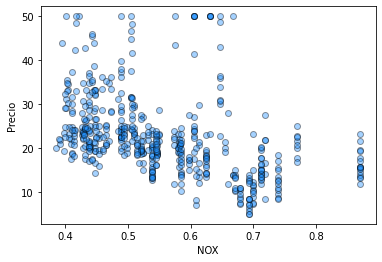

In [ ]:
feature = 'NOX' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

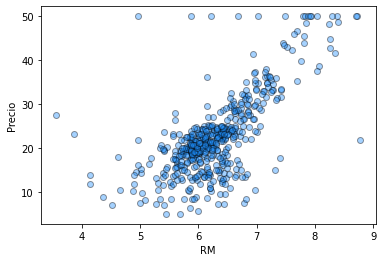

In [ ]:
feature = 'RM' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

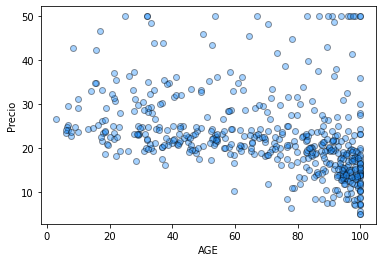

In [ ]:
feature = 'AGE' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

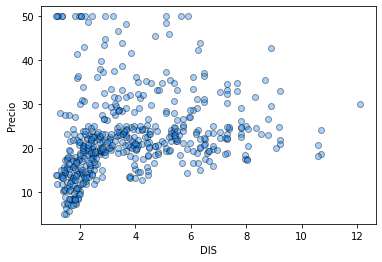

In [ ]:
feature = 'DIS' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

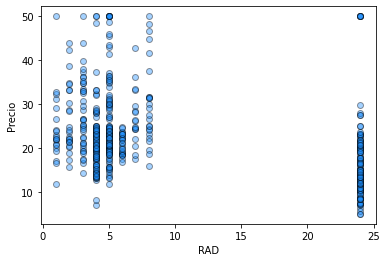

In [ ]:
feature = 'RAD' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

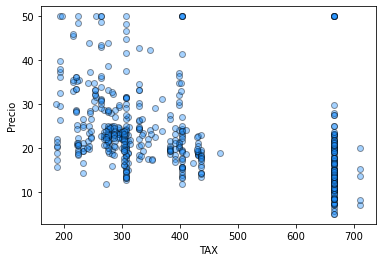

In [ ]:
feature = 'TAX' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

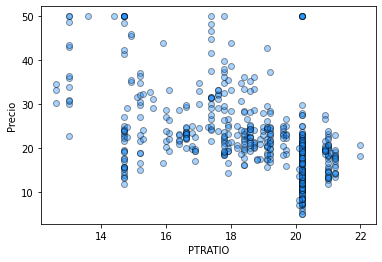

In [ ]:
feature = 'PTRATIO' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

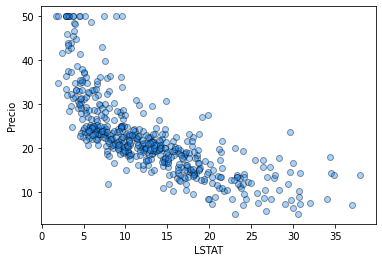

In [ ]:
feature = 'LSTAT' #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(df[feature], y, facecolor="dodgerblue", edgecolor="k", label="datos",alpha = 0.4)
#plt.title(feature)
plt.ylabel('Precio')
plt.xlabel(feature)
plt.show()

**2.2. Estudie las gráficas, identificando *a ojo* los atributos que a su criterio sean los más informativos para la predicción.**

Los atributos que visualmente se muestran más correlacionados con el valor de la casa son: 
- RM (número promedio de habitaciones). Lineal positiva
- LSTAT (% de la población de *status bajo*). Correlación negativa, posiblemente no lineal. 
- En menor medida se ven algunas tendencias en los atributos 
  - NOX (corr. negativa) , 
  - AGE (corr. negativa) ,
  - DIS (en los primeros valores de x corr. positiva hasta 3, y despues de 3 no se identifica visualmente correlación),
  - CRIM (corr. negativa de 0 a 20 en X y luego en los valores mayores a 20 no se identifica visualmente una correlación) 

**2.3 ¿Cuáles son esos atributos? Lístelos en orden de importancia.**

1-RM

2-LSTAT

3-DIS

4-NOX

5-AGE

6-CRIM

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

Definimos una función MAPE de error para poder interpretar

In [ ]:
def mape(y_true, y_pred):
    try:
        mape = np.mean(abs((y_true - y_pred) / y_true)) * 100
    except:
        mape = np.nan

    return mape

Impotamos librerias

In [ ]:
# Agregamos librerias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. Seleccionamos el atributo 'RM'

In [ ]:
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

2. Instanciamos y entrenamos

In [ ]:
lr = LinearRegression(fit_intercept=True)  # el bias no esta como feature
lr.fit(X_train_f, y_train)

LinearRegression()

Visualizamos coeficientes y ordenada al origen

In [ ]:
lr.coef_

array([9.37638431])

Observamos que el coeficiente es positivo

In [ ]:
lr.intercept_

-36.476189627647315

3. Predecimos


In [ ]:
y_train_pred = lr.predict(X_train_f)
y_test_pred = lr.predict(X_test_f)

Evaluamos con distintas métricas

In [ ]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
mape_train = mape(y_train, y_train_pred)
mape_test = mape(y_test, y_test_pred)
print(f'{"Train error (MSE):":13s} {train_error:2.2f}')
print(f'{"Test error  (MSE):":13s} {val_error:2.2f}')

print(f'{"Train error (RMSE):":13s} {np.sqrt(train_error):2.2f}')
print(f'{"Test error  (RMSE):":13s} {np.sqrt(val_error):2.2f}')

print(f'{"Train error (MAPE):":13s} {mape_train:2.2f}%')
print(f'{"Test error  (MAPE):":13s} {mape_test:2.2f}%')

Train error (MSE): 42.82
Test error  (MSE): 46.91
Train error (RMSE): 6.54
Test error  (RMSE): 6.85
Train error (MAPE): 26.18%
Test error  (MAPE): 23.86%


4. Graficamos

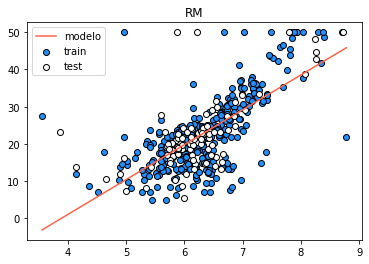

In [ ]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, lr.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
6.85 / y_test.mean()

0.30828626897282035

**5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.**

Eligiendo la característica RM encontramos que el error RMSE del conjunto Test es de 6.85 USD, esto representa un 30% respecto a la media de dicho conjunto. A su vez el error MAPE es de 23.86%. 
Dado la simplicidad del modelo, consideramos que es un buen punto de partida sabiendo que agregando variables o complejizando el modelo los errores pueden disminuir.

Por otro lado, vemos que el error de Train y Test son similares, con esto podemos decir que no se identifica overfitting.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**4.1 Para varios grados de polinomio, haga lo siguiente: Instancie y entrene una regresión polinomial. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores. Guarde los errores en una lista.**

Agregamos librerias

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Seleccionamos el atributo 'RM'

In [ ]:
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_p = X_train[:, selector]
X_test_p = X_test[:, selector]
X_train_p.shape, X_test_p.shape

((404, 1), (102, 1))

Evaluamos el error para distintos grados de polinomio

In [ ]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_p, y_train)
    
    # predict:
    y_train_pred_pf = model.predict(X_train_p)
    y_test_pred_pf = model.predict(X_test_p)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred_pf)
    val_error = mean_squared_error(y_test, y_test_pred_pf)
    train_errors.append(train_error)
    val_errors.append(val_error)

4.2 Graficamos curvas de error

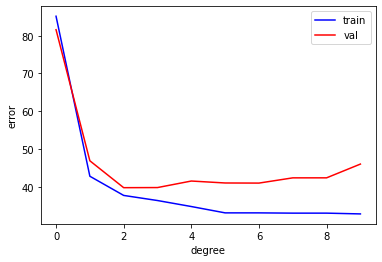

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

En este ejercicio, tomando como feature o característica 'RM', se ajustaron polinomios que van de grado 0 al grado 9. Es de esperar que a medida que aumente el grado del polinomio en los datos de training, el error disminuya, pero no así, en los errores de test. Este comportamiento de los errores de train y test en las dos instancias se observa en la figura anterior.

**4.3 Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.**

Ambas curvas se comportan de manera similar, hasta grado 2. A partir de allí, el error en el entrenamiento es cada vez más bajo mientras que en validación cada vez mas alto. Esto es indicativo de overfitting.



**4.4 Reconstruimos el mejor modelo y lo graficamos**

Elegimos el polinomio de grado 2 como el mejor modelo y con este entrenamos y predecimos.

In [ ]:
n_degree = 2
# Instanciamos
pf = PolynomialFeatures(n_degree)    # polinomio de grado 2
lr_pf = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr_pf)
#  y entrenamos
model.fit(X_train_p, y_train)
# esto es equivalente a:
# 1ero: Z_train = pf.fit_transform(X_train, y_train)
#2do:   lr.fit(Z_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

Observamos coeficientes de la función

In [ ]:
print(lr_pf.coef_)

[ 68.20229886 -23.56509374   2.56037958]


In [ ]:
# Predecimos
y_train_pred_pf = model.predict(X_train_p)
y_test_pred_pf = model.predict(X_test_p)

In [ ]:
# y evaluamos
train_error_pf = mean_squared_error(y_train, y_train_pred_pf)
val_error_pf = mean_squared_error(y_test, y_test_pred_pf)
mape_train_pf = mape(y_train, y_train_pred_pf)
mape_test_pf = mape(y_test, y_test_pred_pf)
print(f'{"Train error (MSE):":13s} {train_error_pf:2.2f}')
print(f'{"Test error  (MSE):":13s} {val_error_pf:2.2f}')

print(f'{"Train error (RMSE):":13s} {np.sqrt(train_error_pf):2.2f}')
print(f'{"Test error  (RMSE):":13s} {np.sqrt(val_error_pf):2.2f}')

print(f'{"Train error (MAPE):":13s} {mape_train_pf:2.2f}%')
print(f'{"Test error  (MAPE):":13s} {mape_test_pf:2.2f}%')

Train error (MSE): 37.75
Test error  (MSE): 39.79
Train error (RMSE): 6.14
Test error  (RMSE): 6.31
Train error (MAPE): 25.29%
Test error  (MAPE): 22.22%


In [ ]:
6.31 / y_test.mean()

0.2839834098129192

Observando las métricas de evaluación el modelo tiene una leve mejora respecto al modelo lineal que utilizamos como punto de partida

*Graficamos*

Se puede observar en azul, los datos utilizados para el entrenamiento, en blanco los datos utilizados para el testeo y en color rojo/anaranjado, el modelo que corresponde a un polinomio (en este caso de grado 2).

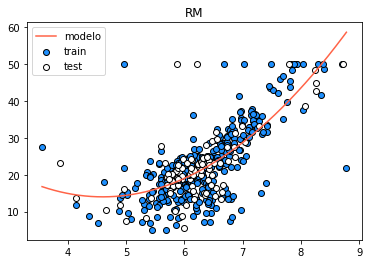

In [ ]:
x_start = min(np.min(X_train_p), np.min(X_test_p))
x_end = max(np.max(X_train_p), np.max(X_test_p))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_p, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_p, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**4.5 Interpretación del resultado**

Sin agregar mucha complejidad al modelo (ya que nos quedamos con un polinomio cuadrático) obtuvimos un resultado levemente mejor al lineal: 
- el RMSE (métrica usada para elegir los hiperparametros) del conjunto de evaluación  mejoró de 6.9 a un 6.3 y 
- el MAPE (métricas más interpretable)del conjunto de evaluación  del modelo bajó de un 23.9% a un 22.2%. 

En este caso se seleccionó un polinomio de grado 2 y es lo que se gráfico en figura anterior. Para elegir el grado óptimo de polinomio se tomo como criterio la situación en que, para distintos grados del polinomio, la diferencia de error entre los datos de entrenamiento y testeo es mínima. Si se hubiera escogido un grado de polinomio mayor a 4, habriamos incurrido en un sobreajuste o también conocido como "Overfitting". Es decir, que el error en la muestra de entrenamiento es muy bajo, pero el error en el momento de ajustar el modelo a datos de validación o testeo aumenta considerablemente. 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

1. Resolver acá. Ayuda (con dos atributos):

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
list_1 = ["RM", "LSTAT", 'DIS']
list_2 = ["RM", "LSTAT", 'CRIM', 'AGE', 'DIS', 'NOX']
selector = np.isin(boston['feature_names'], list_1)
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

2. Evaluamos el error para distintos grados de polinomio

In [ ]:
train_errors_fs = []
test_errors_fs = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
  #print('Para grado', degree, ":")
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(X_train_fs, y_train)
  y_train_pred = model.predict(X_train_fs)
  y_test_pred = model.predict(X_test_fs)
  train_error = mean_squared_error(y_train, y_train_pred)
  #print(f'Train error: {train_error.round(2)}')
  train_errors_fs.append(train_error)
  test_error = mean_squared_error(y_test, y_test_pred)
  #print(f'Test error: {test_error.round(2)}')
  test_errors_fs.append(test_error)
  print(f'Para grado {degree}: Error en train {train_error.round(2)} , Error en test {test_error.round(2)}')

Para grado 1: Error en train 28.4 , Error en test 35.67
Para grado 2: Error en train 14.98 , Error en test 25.07
Para grado 3: Error en train 12.88 , Error en test 27.56
Para grado 4: Error en train 10.97 , Error en test 40.89
Para grado 5: Error en train 9.18 , Error en test 55.81
Para grado 6: Error en train 7.76 , Error en test 102.04
Para grado 7: Error en train 6.64 , Error en test 979.56
Para grado 8: Error en train 5.68 , Error en test 32758.71
Para grado 9: Error en train 5.04 , Error en test 122672.23


Graficamos

Error en train 14.98
Error en train 25.07


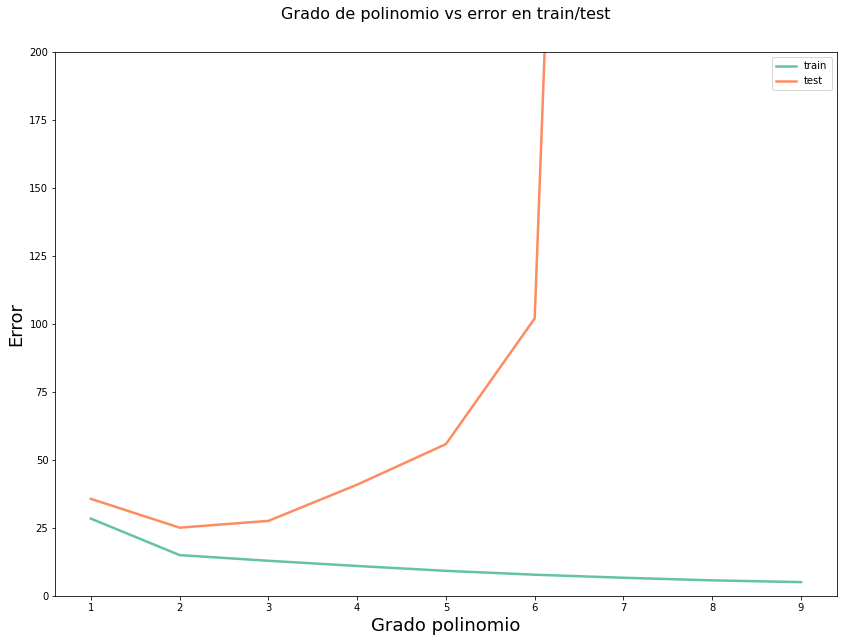

In [ ]:
fig, axes = plt.subplots(figsize=(14,10))
c = sns.color_palette("Set2", 3)
sns.lineplot(x=degrees, y=train_errors_fs, label='train', lw=2.5, color=c[0])
sns.lineplot(x=degrees, y=test_errors_fs, label='test', lw=2.5, color=c[1])
plt.xlabel('Grado polinomio', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.ylim(0, 200)

plt.title('Grado de polinomio vs error en train/test', fontsize=16, y=1.05);


print(f'Error en train {train_errors_fs[1].round(2)}') 
print(f'Error en train {test_errors_fs[1].round(2)}') 

In [ ]:
n_degree2 = 2
pf = PolynomialFeatures(n_degree2)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_fs, y_train)
# Predecimos
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

# y evaluamos
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
mape_train = mape(y_train, y_train_pred)
mape_test = mape(y_test, y_test_pred)
print(f'{"Train error (MSE):":13s} {train_error:2.2f}')
print(f'{"Test error  (MSE):":13s} {val_error:2.2f}')

print(f'{"Train error (RMSE):":13s} {np.sqrt(train_error):2.2f}')
print(f'{"Test error  (RMSE):":13s} {np.sqrt(val_error):2.2f}')

print(f'{"Train error (MAPE):":13s} {mape_train:2.2f}%')
print(f'{"Test error  (MAPE):":13s} {mape_test:2.2f}%')

Train error (MSE): 14.98
Test error  (MSE): 25.07
Train error (RMSE): 3.87
Test error  (RMSE): 5.01
Train error (MAPE): 14.79%
Test error  (MAPE): 16.31%


**3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?**

Observamos que al agregar más variables (3) obtuvimos el mismo grado de polinomio como el mejor modelo y los errores disminuyeron respecto al modelo anterior (con polinomio 2 y una variable): 
- RMSE (Test): 6.3 a 5.0 
- MAPE (Test): 22.2% a 16.3%

Interpretamos que el modelo mejora por agregarle más información relevante.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
